# Fig.3 - Comparisons of MDR's AUC across 12 different sets

In [1]:
plot_savepath = 'saved_figures/FigC_AUC_IQR_noimp'

Change plot's default size and font

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

In [3]:
TITLE_FONTSIZE = 20
XLABEL_FONTSIZE = 20
YLABEL_PADDING = 190

=== Set 1 ===
MFT        =    4.62 (   2.22-  15.50)
5-yr Cyc   =    4.12 (   1.93-  15.37)
Adp Cyc    =    5.96 (   1.76-  21.38)
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.18265970436207685 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.35380785006974724 **
=== Set 5 ===
MFT        =    6.18 (   1.80-  31.24)
5-yr Cyc   =    4.67 (   1.87-  17.45)
Adp Cyc    =   14.82 (   2.62- 102.87)
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.2783886474078916 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.014967437287511839 **
=== Set 9 ===
MFT        =    0.23 (   0.06-   0.94)
5-yr Cyc   =    0.13 (   0.04-   0.48)
Adp Cyc    =    0.10 (   0.03-   0.74)
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.03418205110682934 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.018068774411482195 **
=== Set 2 ===
MFT        =    5.63 (   2.48-  13.50)
5-yr Cyc   =    5.88 (   3.09-  14.24)
Adp Cyc    =    8.76 (   3.44-  19.88)
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.2598418752381669 **
** MFT vs Adpt-Cyc Mann-Whit

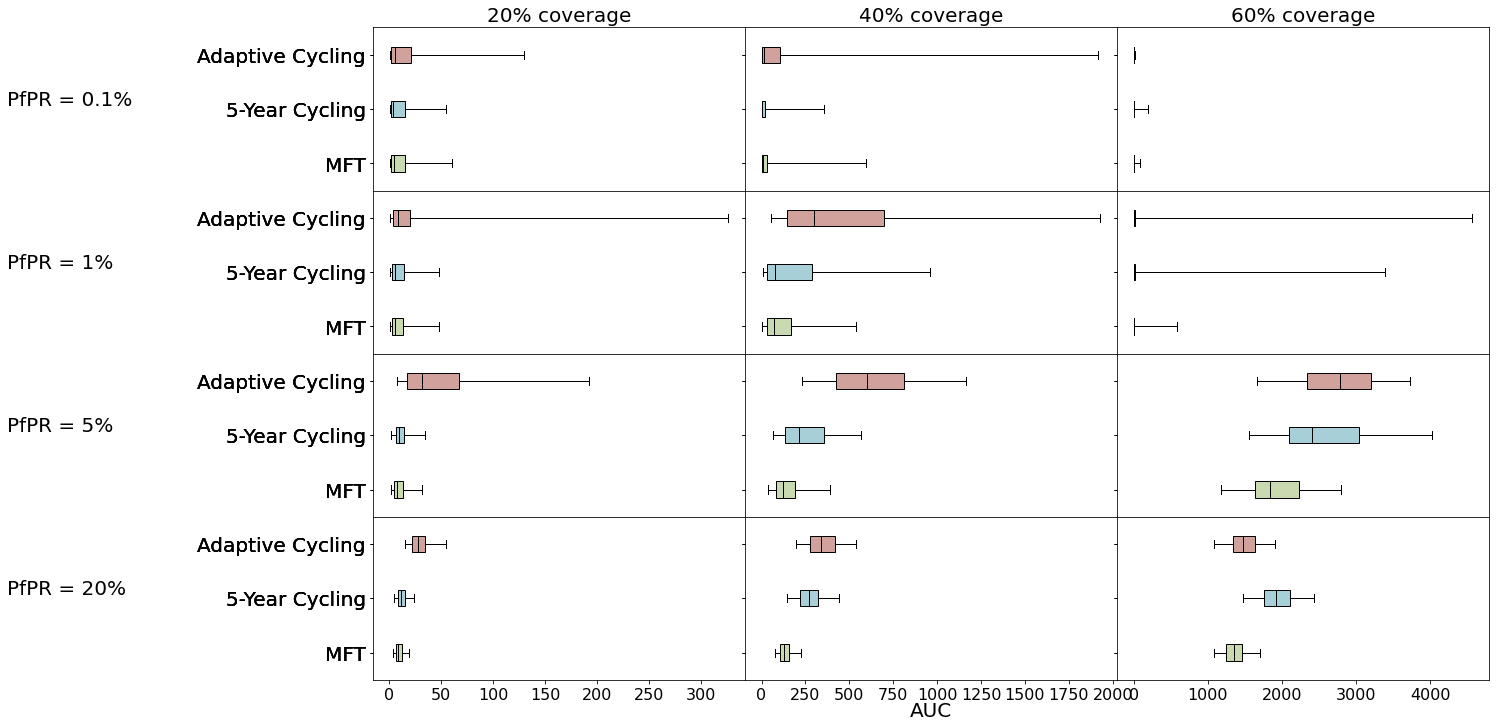

In [4]:
from plotter import fig_c_auc_calculation
from scipy.stats import mannwhitneyu
fig, axes = plt.subplots(4, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
labels = ['MFT', '5-Year Cycling', 'Adaptive Cycling']

for rownum in range(4):
  if rownum == 0:
    for idx, covtext in enumerate([20,40,60]):
      axes[0][idx].set_title(f'{covtext}% coverage', fontsize=XLABEL_FONTSIZE)
  for (a,idx) in zip([1+rownum,5+rownum,9+rownum],[0,1,2]): # setnum, indexnum
    print(f'=== Set {a} ===')
    fdir_path = f'simulation_outputs/set{a}'
    print('{:10s} = '.format('MFT'), end='')
    aucs_m, box_m = fig_c_auc_calculation(
      fdir_path+'_m/', 
      'MFT', 
      verbose='on'
    )
    print('{:10s} = '.format('5-yr Cyc'), end='')
    aucs_c, box_c = fig_c_auc_calculation(
      fdir_path+'_c/', 
      '5-Year Cycling',
      verbose='on'
    )
    print('{:10s} = '.format('Adp Cyc'), end='')
    aucs_ac, box_ac = fig_c_auc_calculation(
      fdir_path+'_ac/', 
      'Adaptive Cycling',
      verbose='on'
    )
    bplot = axes[rownum][idx].bxp(
      [box_m, box_c, box_ac], 
      showfliers=False, 
      vert=False, 
      patch_artist=True,
      medianprops=dict(color='k')
    )
    colors = ['#cadab0', '#a6cfd8', '#d1a29b'] # green, blue, coral
    for patch, color in zip(bplot['boxes'], colors):
      patch.set_facecolor(color)
    _, p_m_vs_c = mannwhitneyu(aucs_m, aucs_c)
    _, p_m_vs_a = mannwhitneyu(aucs_m, aucs_ac)
    print(f'** MFT vs 5-yr-Cyc Mann-Whitney p-value: {p_m_vs_c} **')
    print(f'** MFT vs Adpt-Cyc Mann-Whitney p-value: {p_m_vs_a} **')
    
  
for c in range(4):
  for tick in axes[c][0].yaxis.get_major_ticks():
    tick.label.set_fontsize(XLABEL_FONTSIZE)

axes[0][0].set_ylabel('PfPR = 0.1%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[1][0].set_ylabel('PfPR = 1%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[2][0].set_ylabel('PfPR = 5%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[3][0].set_ylabel('PfPR = 25%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)

for c in range(3):
  for tick in axes[3][c].xaxis.get_major_ticks():
    tick.label.set_fontsize(XLABEL_FONTSIZE-4)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# add common x- and y-labels
plt.xlabel('AUC', fontsize=XLABEL_FONTSIZE)

if plot_savepath != '':
  plt.savefig(fname=plot_savepath+'.svg', format='svg', bbox_inches='tight')